Epoch 1/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 22s 13ms/step - accuracy: 0.2307 - loss: 2.4803 - val_accuracy: 0.3453 - val_loss: 1.9304
Epoch 2/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 21s 13ms/step - accuracy: 0.3446 - loss: 1.9119 - val_accuracy: 0.3757 - val_loss: 1.8282
Epoch 3/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 21s 13ms/step - accuracy: 0.3623 - loss: 1.8525 - val_accuracy: 0.3856 - val_loss: 1.8075
Epoch 4/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 42s 14ms/step - accuracy: 0.3838 - loss: 1.8085 - val_accuracy: 0.4179 - val_loss: 1.7332
Epoch 5/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 40s 13ms/step - accuracy: 0.3977 - loss: 1.7672 - val_accuracy: 0.3844 - val_loss: 1.7992
Epoch 6/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 41s 13ms/step - accuracy: 0.4083 - loss: 1.7408 - val_accuracy: 0.4241 - val_loss: 1.7088
Epoch 7/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 22s 14ms/step - accuracy: 0.4162 - loss: 1.7300 - val_accuracy: 0.4299 - val_loss: 1.6952
Epoch 8/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 40s 13ms/step - accuracy: 0.4144 -

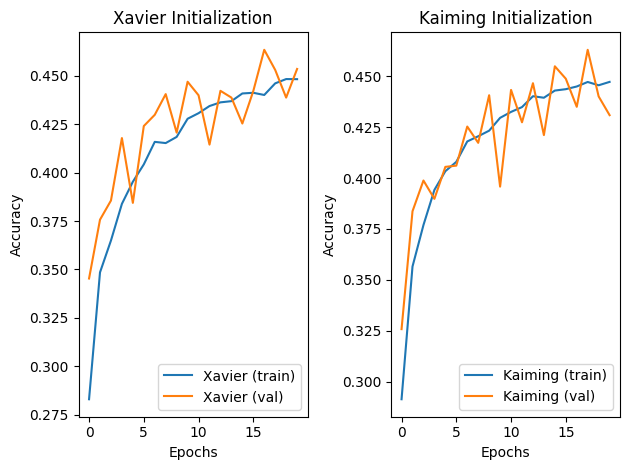

In [2]:
import tensorflow as tf
from tensorflow.keras import layers, models, initializers
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()
train_images, test_images = train_images / 255.0, test_images / 255.0
train_labels, test_labels = to_categorical(train_labels), to_categorical(test_labels)

def create_model(initializer, dropout_rate=0.0, l2_regularizer=None):
    model = models.Sequential()
    model.add(layers.Flatten(input_shape=(32, 32, 3)))
    model.add(layers.Dense(512, kernel_initializer=initializer, kernel_regularizer=l2_regularizer, activation='relu'))
    model.add(layers.Dense(256, kernel_initializer=initializer, kernel_regularizer=l2_regularizer, activation='relu'))
    model.add(layers.Dense(128, kernel_initializer=initializer, kernel_regularizer=l2_regularizer, activation='relu'))
    model.add(layers.Dense(64, kernel_initializer=initializer, kernel_regularizer=l2_regularizer, activation='relu'))  # Additional dense layer
    model.add(layers.Dense(32, kernel_initializer=initializer, kernel_regularizer=l2_regularizer, activation='relu'))  # Additional dense layer
    model.add(layers.Dense(10, activation='softmax'))
    return model

xavier_initializer = initializers.glorot_normal()
kaiming_initializer = initializers.he_normal()

xavier_model = create_model(xavier_initializer, dropout_rate=0.3, l2_regularizer=tf.keras.regularizers.l2(0.001))
kaiming_model = create_model(kaiming_initializer, dropout_rate=0.3, l2_regularizer=tf.keras.regularizers.l2(0.001))
xavier_model.compile(optimizer='adam',
                     loss='categorical_crossentropy',
                     metrics=['accuracy'])
kaiming_model.compile(optimizer='adam',
                      loss='categorical_crossentropy',
                      metrics=['accuracy'])

xavier_history = xavier_model.fit(train_images, train_labels, epochs=20, validation_data=(test_images, test_labels))
kaiming_history = kaiming_model.fit(train_images, train_labels, epochs=20, validation_data=(test_images, test_labels))

xavier_loss, xavier_acc = xavier_model.evaluate(test_images, test_labels, verbose=0)
kaiming_loss, kaiming_acc = kaiming_model.evaluate(test_images, test_labels, verbose=0)

print("\nFinal Test Accuracy (Xavier):", xavier_acc)
print("Final Test Accuracy (Kaiming):", kaiming_acc)

plt.subplot(1, 2, 1)
plt.plot(xavier_history.history['accuracy'], label='Xavier (train)')
plt.plot(xavier_history.history['val_accuracy'], label='Xavier (val)')
plt.title('Xavier Initialization')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(kaiming_history.history['accuracy'], label='Kaiming (train)')
plt.plot(kaiming_history.history['val_accuracy'], label='Kaiming (val)')
plt.title('Kaiming Initialization')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.tight_layout()
plt.show()